# Data structuring

In [1]:
# Loading packages

import requests
from bs4 import BeautifulSoup
import os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load df from disk

df = pd.read_csv("speeches/data.csv")

In [3]:
df.head()

,Unnamed: 0,Name,Date,Speech,Type,Party
0,0,Donald Trump,"February 05, 2019","\r\n \r\n \r\nMadam Speaker, Mr. Vic...",State of the Union,Republican
1,1,Donald Trump,"January 30, 2018","\r\n \r\n Mr. Speaker, Mr. Vice Pres...",State of the Union,Republican
2,2,Donald Trump,"January 20, 2017","\r\n \r\n Chief Justice Roberts, Pre...",Inaugural Address,Republican
3,3,Barack Obama,"January 12, 2016","\r\n \r\n Mr. Speaker, Mr. Vice Pres...",State of the Union,Democrat
4,4,Barack Obama,"January 20, 2015","\r\n \r\n Mr. Speaker, Mr. Vice Pres...",State of the Union,Democrat


In [4]:
len(df)

250

In [5]:
df["Speech"] = df["Speech"].str.replace("transcript-inner", "").str.replace(u'\xa0', u' ')

In [6]:
print(df['Speech'].loc[9])


      
      Mr. Speaker, Mr. Vice President, members of Congress, distinguished guests, and fellow Americans:

      Tonight I want to begin by congratulating the men and women of the 112th Congress, as well as your new Speaker, John Boehner.  (Applause.)  And as we mark this occasion, we’re also mindful of the empty chair in this chamber, and we pray for the health of our colleague -- and our friend -– Gabby Giffords.  (Applause.)

      It’s no secret that those of us here tonight have had our differences over the last two years.  The debates have been contentious; we have fought fiercely for our beliefs.  And that’s a good thing.  That’s what a robust democracy demands.  That’s what helps set us apart as a nation.

      But there’s a reason the tragedy in Tucson gave us pause. Amid all the noise and passion and rancor of our public debate, Tucson reminded us that no matter who we are or where we come from, each of us is a part of something greater -– something more consequential 

In [7]:
# drops party orientation that isn't Rep or Dem
df2 = df.drop(df.index[172:250])

In [8]:
df2.head()

,Unnamed: 0,Name,Date,Speech,Type,Party
0,0,Donald Trump,"February 05, 2019","\r\n \r\n \r\nMadam Speaker, Mr. Vic...",State of the Union,Republican
1,1,Donald Trump,"January 30, 2018","\r\n \r\n Mr. Speaker, Mr. Vice Pres...",State of the Union,Republican
2,2,Donald Trump,"January 20, 2017","\r\n \r\n Chief Justice Roberts, Pre...",Inaugural Address,Republican
3,3,Barack Obama,"January 12, 2016","\r\n \r\n Mr. Speaker, Mr. Vice Pres...",State of the Union,Democrat
4,4,Barack Obama,"January 20, 2015","\r\n \r\n Mr. Speaker, Mr. Vice Pres...",State of the Union,Democrat


In [9]:
# creates party dummy
Party_dummy = pd.get_dummies(df2['Party'], drop_first=True)
# Party_dummy

In [10]:
df2['Republican'] = Party_dummy

In [11]:
df2.head()
print(len(df2))

172


In [12]:
#Number of words in each speech
df2["word_count"] = df2["Speech"].apply(lambda x : len(x))
#Number of unique words in each speech
df2["unique_word"] = df2["Speech"].apply(lambda x : len(set(x.lower().split()) ) )
#Number of unique words ratio in each speech
df2["unique_word_ratio"] = df2.apply(lambda x : x["unique_word"]/x["word_count"] ,axis=1)
#Extracting year alone from the Date column
df2["year"] = df2["Date"].apply(lambda x : int(x.split(",")[2])  if len(x.split(","))==3 else int(x.split(",")[1]) )
df2.head()

,Unnamed: 0,Name,Date,Speech,Type,Party,Republican,word_count,unique_word,unique_word_ratio,year
0,0,Donald Trump,"February 05, 2019","\r\n \r\n \r\nMadam Speaker, Mr. Vic...",State of the Union,Republican,1,30948,1909,0.061684,2019
1,1,Donald Trump,"January 30, 2018","\r\n \r\n Mr. Speaker, Mr. Vice Pres...",State of the Union,Republican,1,30540,1905,0.062377,2018
2,2,Donald Trump,"January 20, 2017","\r\n \r\n Chief Justice Roberts, Pre...",Inaugural Address,Republican,1,8551,621,0.072623,2017
3,3,Barack Obama,"January 12, 2016","\r\n \r\n Mr. Speaker, Mr. Vice Pres...",State of the Union,Democrat,0,35410,1930,0.054504,2016
4,4,Barack Obama,"January 20, 2015","\r\n \r\n Mr. Speaker, Mr. Vice Pres...",State of the Union,Democrat,0,40477,2067,0.051066,2015


In [13]:
print(df2['Party'])

0      Republican
1      Republican
2      Republican
3        Democrat
4        Democrat
5        Democrat
6        Democrat
7        Democrat
8        Democrat
9        Democrat
10       Democrat
11       Democrat
12     Republican
13     Republican
14     Republican
15     Republican
16     Republican
17     Republican
18     Republican
19     Republican
20     Republican
21       Democrat
22       Democrat
23       Democrat
24       Democrat
25       Democrat
26       Democrat
27       Democrat
28     Republican
29     Republican
          ...    
142    Republican
143    Republican
144    Republican
145    Republican
146    Republican
147    Republican
148    Republican
149    Republican
150    Republican
151    Republican
152    Republican
153    Republican
154    Republican
155    Republican
156    Republican
157    Republican
158    Republican
159    Republican
160    Republican
161    Republican
162      Democrat
163      Democrat
164      Democrat
165      Democrat
166      D

Text(0, 0.5, 'Word count')

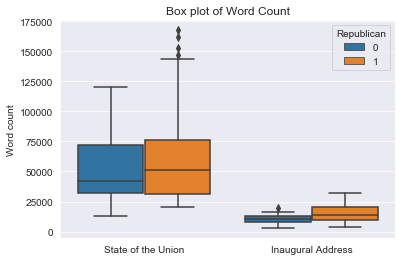

In [14]:
sns.set_style("darkgrid")
ax = sns.boxplot(x='Type', y="word_count", orient='v', hue='Republican', data=df2)
plt.title("Box plot of Word Count")
plt.xlabel("")
plt.ylabel("Word count")

In [15]:
max(df2['word_count'])
min(df2['word_count'])

3027

In [16]:
# Trying to make to new dataframes; one with InAug speeches and one 
# with State.

#df_inaug = []
#df_state = []

#for speech in df2['Type']:
 #   if 'Type'=='Inaugural Address':
  #      df_inaug.append
   # else:
    #    df_state.append


#df_by_speech = df2.groupby('Type').head()

#df_inaug = [g for _, g in df2.groupby('Type'=='Inaugural Address')]
#df_state = [g for _, g in df2.groupby('Type'=='State of the Union')]

KeyError: False

In [17]:
#df_inaug = df_by_speech['Type'=='Inaugural Adress']
#df_inaug
#print(len(df_inaug))
#df_state = df_by_speech['Type'=='State of the Union']
#print(len(df_state))

NameError: name 'df_by_speech' is not defined

In [18]:
# state of the union dataset
df_speech_des = df2.groupby('Type').describe().head()

In [19]:
df_speech_des.head()

Unnamed: 0                                                \
                        count       mean        std  min   25%   50%    75%   
Type                                                                          
Inaugural Address        39.0  83.692308  48.086082  2.0  52.0  73.0  122.5   
State of the Union      133.0  86.030075  50.451888  0.0  40.0  89.0  129.0   

                          Republican            ... unique_word_ratio  \
                      max      count      mean  ...               75%   
Type                                            ...                     
Inaugural Address   171.0       39.0  0.589744  ...          0.074271   
State of the Union  170.0      133.0  0.646617  ...          0.054696   

                               year                                          \
                         max  count         mean        std     min     25%   
Type                                                                          
Inaugural Address   0.093575   39.0  1931.358974  48.806539  1853.0  1891.0   
State of the Union  0.067571  133.0  1929.293233  51.919924  1853.0  1887.0   

                                            
                       50%     75%     max  
Type                                        
Inaugural Address   1929.0  1971.0  2017.0  
State of the Union  1916.0  1981.0  2019.0  

[2 rows x 48 columns]

In [20]:
#df_speech_des['word_count']
#with open('mytable.tex','w') as tf:
 #   tf.write(df_by_speech.to_latex())

NameError: name 'df_by_speech' is not defined

Text(-12.575000000000003, 0.5, '')

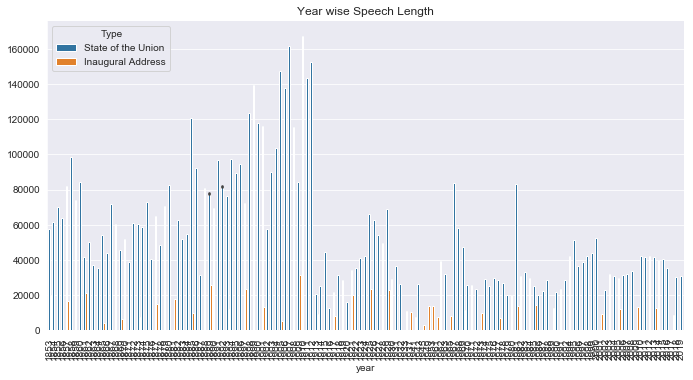

In [22]:
timeline = sns.catplot(x="year",y="word_count",hue="Type",data=df2,kind="bar",height=5,aspect=2,legend_out=False)
timeline.set_xticklabels(rotation=90)
plt.title("Year wise Speech Length")
plt.ylabel("")

# Text analysis

In [23]:
# Download positive and negative sentiment lexicons, split into words and convert to set representation. 
negative = set(requests.get('http://ptrckprry.com/course/ssd/data/negative-words.txt').text.split(';\n')[-1].split('\n'))
positive = set(requests.get('http://ptrckprry.com/course/ssd/data/positive-words.txt').text.split(';\n')[-1].split('\n'))
print(len(negative),len(positive))

4784 2007


In [24]:
# initialize tokenizer
#import nltk
#nltk.download('punkt')

from nltk import sent_tokenize, word_tokenize
#tokenizer = sent_tokenize

In [25]:
# define function
def sent_preproc(string):
    return sent_tokenize(string.lower())

In [26]:
def word_preproc(string):
    return word_tokenize(string.lower())

In [27]:
# apply function
sentences = df2.Speech.apply(sent_preproc)

In [28]:
words = df2.Speech.apply(word_preproc)

In [29]:
sentences.head()

0    [\r\n      \r\n      \r\nmadam speaker, mr. vi...
1    [\r\n      \r\n      mr. speaker, mr. vice pre...
2    [\r\n      \r\n      chief justice roberts, pr...
3    [\r\n      \r\n      mr. speaker, mr. vice pre...
4    [\r\n      \r\n      mr. speaker, mr. vice pre...
Name: Speech, dtype: object

In [30]:
words.head()

0    [madam, speaker, ,, mr., vice, president, ,, m...
1    [mr., speaker, ,, mr., vice, president, ,, mem...
2    [chief, justice, roberts, ,, president, carter...
3    [mr., speaker, ,, mr., vice, president, ,, mem...
4    [mr., speaker, ,, mr., vice, president, ,, mem...
Name: Speech, dtype: object

In [31]:
# Defines function for counting number of matches with pos/neg words
def count_dictionary(tokenized_doc,dictionary):
    return len([word for word in tokenized_doc if word in dictionary])

In [32]:
df2['positive_words'] = words.apply(count_dictionary,dictionary=positive)
df2['negative_words'] = words.apply(count_dictionary,dictionary=negative)

In [33]:
# positive and negative words to total words ration
df2["positive_words_ratio"] = df2['positive_words']/df2['word_count']
df2["negative_words_ratio"] = df2['negative_words']/df2['word_count']

Adding "words" and "sentences" to the df2 dataframe

In [41]:
df2["words"]=words 
df2["sentences"]=sentences

In [42]:
df2

,Unnamed: 0,Name,Date,Speech,Type,Party,Republican,word_count,unique_word,unique_word_ratio,year,positive_words,negative_words,positive_words_ratio,negative_words_ratio,words,sentences
0,0,Donald Trump,"February 05, 2019","\r\n \r\n \r\nMadam Speaker, Mr. Vic...",State of the Union,Republican,1,30948,1909,0.061684,2019,226,159,0.007303,0.005138,"[madam, speaker, ,, mr., vice, president, ,, m...","[\r\n \r\n \r\nmadam speaker, mr. vi..."
1,1,Donald Trump,"January 30, 2018","\r\n \r\n Mr. Speaker, Mr. Vice Pres...",State of the Union,Republican,1,30540,1905,0.062377,2018,232,132,0.007597,0.004322,"[mr., speaker, ,, mr., vice, president, ,, mem...","[\r\n \r\n mr. speaker, mr. vice pre..."
2,2,Donald Trump,"January 20, 2017","\r\n \r\n Chief Justice Roberts, Pre...",Inaugural Address,Republican,1,8551,621,0.072623,2017,77,26,0.009005,0.003041,"[chief, justice, roberts, ,, president, carter...","[\r\n \r\n chief justice roberts, pr..."
3,3,Barack Obama,"January 12, 2016","\r\n \r\n Mr. Speaker, Mr. Vice Pres...",State of the Union,Democrat,0,35410,1930,0.054504,2016,276,145,0.007794,0.004095,"[mr., speaker, ,, mr., vice, president, ,, mem...","[\r\n \r\n mr. speaker, mr. vice pre..."
4,4,Barack Obama,"January 20, 2015","\r\n \r\n Mr. Speaker, Mr. Vice Pres...",State of the Union,Democrat,0,40477,2067,0.051066,2015,299,162,0.007387,0.004002,"[mr., speaker, ,, mr., vice, president, ,, mem...","[\r\n \r\n mr. speaker, mr. vice pre..."
5,5,Barack Obama,"January 28, 2014","\r\n \r\n Mr. Speaker, Mr. Vice Pres...",State of the Union,Democrat,0,40205,2166,0.053874,2014,304,133,0.007561,0.003308,"[mr., speaker, ,, mr., vice, president, ,, mem...","[\r\n \r\n mr. speaker, mr. vice pre..."
6,6,Barack Obama,"February 13, 2013","\r\n \r\n \r\nMr. Speaker, Mr. Vice ...",State of the Union,Democrat,0,41416,2098,0.050657,2013,324,124,0.007823,0.002994,"[mr., speaker, ,, mr., vice, president, ,, mem...","[\r\n \r\n \r\nmr. speaker, mr. vice..."
7,7,Barack Obama,"January 21, 2013","\r\n \r\n \r\nVice President Biden, ...",Inaugural Address,Democrat,0,12489,867,0.069421,2013,102,48,0.008167,0.003843,"[vice, president, biden, ,, mr., chief, justic...","[\r\n \r\n \r\nvice president biden,..."
8,8,Barack Obama,"January 24, 2012","\r\n \r\n Mr. Speaker, Mr. Vice Pre...",State of the Union,Democrat,0,42443,2106,0.049619,2012,300,147,0.007068,0.003463,"[mr., speaker, ,, mr., vice, president, ,, mem...","[\r\n \r\n mr. speaker, mr. vice pr..."
9,9,Barack Obama,"January 25, 2011","\r\n \r\n Mr. Speaker, Mr. Vice Pres...",State of the Union,Democrat,0,41939,2082,0.049644,2011,283,103,0.006748,0.002456,"[mr., speaker, ,, mr., vice, president, ,, mem...","[\r\n \r\n mr. speaker, mr. vice pre..."


## Positive and negative words

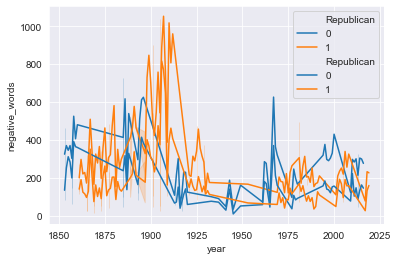

In [35]:
# plotting positive and negative words against each other 
sentiment = sns.lineplot(x="year",y="positive_words", hue='Republican', data=df2)
sentiment = sns.lineplot(x="year",y="negative_words", hue='Republican', data=df2)
plt.show()

#timeline.set_xticklabels(rotation=90)
#plt.title("Year wise Speech Length")
#plt.ylabel("")

## Positive and negative words ratio

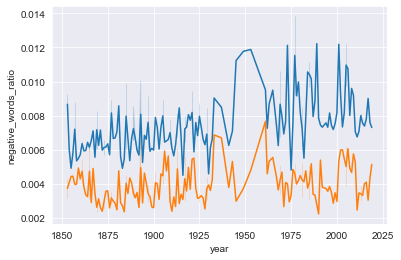

In [36]:
# plotting positive and negative words ratios against each other 
sentiment_r = sns.lineplot(x="year",y="positive_words_ratio", data=df2)
sentiment_r = sns.lineplot(x="year",y="negative_words_ratio", data=df2)
plt.show()

#timeline.set_xticklabels(rotation=90)
#plt.title("Year wise Speech Length")
#plt.ylabel("")

## Sentiment analysis using VADER

In [37]:
#!pip install vaderSentiment

In [38]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [39]:
# using polarity_scores() to obtain the polarity indices for given sentence
def sentiment_analyzer_scores(sentence):
    score = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [40]:
# THIS TAKES A LONG TIME RUNNING, SO DON'T RUN IT JUST FOR FUN

# This doesn't work as well as the code below, but we might have
# to find a way to do a function that applies the VADER to
# every single row... if that isn't what we are doing below.

# applying the sentiment_analyzer function
vader_sent = df2['Speech'].apply(sentiment_analyzer_scores)


      
      
Madam Speaker, Mr. Vice President, Members of Congress, the First Lady of the United States, and my fellow Americans:

We meet tonight at a moment of unlimited potential. As we begin a new Congress, I stand here ready to work with you to achieve historic breakthroughs for all Americans.

Millions of our fellow citizens are watching us now, gathered in this great chamber, hoping that we will govern not as two parties but as one Nation.

The agenda I will lay out this evening is not a Republican agenda or a Democrat agenda. It is the agenda of the American people.

Many of us campaigned on the same core promises: to defend American jobs and demand fair trade for American workers; to rebuild and revitalize our Nation’s infrastructure; to reduce the price of healthcare and prescription drugs; to create an immigration system that is safe, lawful, modern, and secure; and to pursue a foreign policy that puts America’s interests first.

There is a new opportunity in American pol


      
      Mr. Speaker, Mr. Vice President, Members of Congress, the First Lady of the United States, and my fellow Americans:

Less than 1 year has passed since I first stood at this podium, in this majestic chamber, to speak on behalf of the American People—and to address their concerns, their hopes, and their dreams. That night, our new Administration had already taken swift action. A new tide of optimism was already sweeping across our land.

Each day since, we have gone forward with a clear vision and a righteous mission—to make America great again for all Americans.

Over the last year, we have made incredible progress and achieved extraordinary success. We have faced challenges we expected, and others we could never have imagined. We have shared in the heights of victory and the pains of hardship. We endured floods and fires and storms. But through it all, we have seen the beauty of America’s soul, and the steel in America’s spine.

Each test has forged new American heroes to


      
      Mr. Speaker, Mr. Vice President, Members of Congress, my fellow Americans:

Tonight marks the eighth year that I’ve come here to report on the State of the Union. And for this final one, I’m going to try to make it a little shorter. (Applause.) I know some of you are antsy to get back to Iowa. (Laughter.) I've been there. I'll be shaking hands afterwards if you want some tips. (Laughter.)

And I understand that because it’s an election season, expectations for what we will achieve this year are low. But, Mr. Speaker, I appreciate the constructive approach that you and the other leaderstook at the end of last year to pass a budget and make tax cuts permanent for working families. So I hope we can work together this year on some bipartisan priorities like criminal justice reform -- (applause) -- and helping people who are battling prescription drug abuse and heroin abuse. (Applause.) So, who knows, we might surprise the cynics again.

But tonight, I want to go easy on the t


      
      Mr. Speaker, Mr. Vice President, Members of Congress, my fellow Americans:
 
We are 15 years into this new century.  Fifteen years that dawned with terror touching our shores; that unfolded with a new generation fighting two long and costly wars; that saw a vicious recession spread across our nation and the world.  It has been, and still is, a hard time for many. 
 
But tonight, we turn the page.  Tonight, after a breakthrough year for America, our economy is growing and creating jobs at the fastest pace since 1999.  (Applause.)  Our unemployment rate is now lower than it was before the financial crisis.  More of our kids are graduating than ever before.  More of our people are insured than ever before.  (Applause.)  And we are as free from the grip of foreign oil as we’ve been in almost 30 years.  (Applause.)
 
Tonight, for the first time since 9/11, our combat mission in Afghanistan is over.  (Applause.)  Six years ago, nearly 180,000 American troops served in Iraq and 


      
      Mr. Speaker, Mr. Vice President, Members of Congress, my fellow Americans:

Today in America, a teacher spent extra time with a student who needed it, and did her part to lift America’s graduation rate to its highest level in more than three decades.

An entrepreneur flipped on the lights in her tech startup, and did her part to add to the more than eight million new jobs our businesses have created over the past four years. 

An autoworker fine-tuned some of the best, most fuel-efficient cars in the world, and did his part to help America wean itself off foreign oil.

A farmer prepared for the spring after the strongest five-year stretch of farm exports in our history.  A rural doctor gave a young child the first prescription to treat asthma that his mother could afford.  A man took the bus home from the graveyard shift, bone-tired but dreaming big dreams for his son.  And in tight-knit communities across America, fathers and mothers will tuck in their kids, put an arm a


      
      
Mr. Speaker, Mr. Vice President, members of Congress, fellow citizens:  
 
Fifty-one years ago, John F. Kennedy declared to this chamber that “the Constitution makes us not rivals for power but partners for progress.”  (Applause.) “It is my task,” he said, “to report the State of the Union -- to improve it is the task of us all.”  
 
Tonight, thanks to the grit and determination of the American people, there is much progress to report.  After a decade of grinding war, our brave men and women in uniform are coming home.  (Applause.)  After years of grueling recession, our businesses have created over six million new jobs.  We buy more American cars than we have in five years, and less foreign oil than we have in 20.  (Applause.)  Our housing market is healing, our stock market is rebounding, and consumers, patients, and homeowners enjoy stronger protections than ever before.  (Applause.)  
 
So, together, we have cleared away the rubble of crisis, and we can say with rene


      
      
Vice President Biden, Mr. Chief Justice,
members of the United States Congress, distinguished guests, and fellow citizens:  
 
Each time we gather to inaugurate a President we bear witness to the enduring strength of our Constitution.  We affirm the promise of our democracy.  We recall that what binds this nation together is not the colors of our skin or the tenets of our faith or the origins of our names.  What makes us exceptional -- what makes us American -- is our allegiance to an idea articulated in a declaration made more than two centuries ago:
“We hold these truths to be self-evident, that all men are created equal; that they are endowed by their Creator with certain unalienable rights; that among these are life, liberty, and the pursuit of happiness.”  
 
Today we continue a never-ending journey to bridge the meaning of those words with the realities of our time.  For history tells us that while these truths may be self-evident, they’ve never been self-executing


      
       Mr. Speaker, Mr. Vice President, members of Congress, distinguished guests, and fellow Americans:

Last month, I went to Andrews Air Force Base and welcomed home some of our last troops to serve in Iraq.  Together, we offered a final, proud salute to the colors under which more than a million of our fellow citizens fought -- and several thousand gave their lives.

We gather tonight knowing that this generation of heroes has made the United States safer and more respected around the world.  (Applause.)  For the first time in nine years, there are no Americans fighting in Iraq.  (Applause.)  For the first time in two decades, Osama bin Laden is not a threat to this country.  (Applause.)  Most of al Qaeda’s top lieutenants have been defeated.  The Taliban’s momentum has been broken, and some troops in Afghanistan have begun to come home.

These achievements are a testament to the courage, selflessness and teamwork of America’s Armed Forces.  At a time when too many of our i


      
      Mr. Speaker, Mr. Vice President, members of Congress, distinguished guests, and fellow Americans:

      Tonight I want to begin by congratulating the men and women of the 112th Congress, as well as your new Speaker, John Boehner.  (Applause.)  And as we mark this occasion, we’re also mindful of the empty chair in this chamber, and we pray for the health of our colleague -- and our friend -– Gabby Giffords.  (Applause.)

      It’s no secret that those of us here tonight have had our differences over the last two years.  The debates have been contentious; we have fought fiercely for our beliefs.  And that’s a good thing.  That’s what a robust democracy demands.  That’s what helps set us apart as a nation.

      But there’s a reason the tragedy in Tucson gave us pause. Amid all the noise and passion and rancor of our public debate, Tucson reminded us that no matter who we are or where we come from, each of us is a part of something greater -– something more consequential 


      
      Madam Speaker, Vice President Biden, Members of Congress, distinguished guests, and fellow Americans:

Our Constitution declares that from time to time, the President shall give to Congress information about the state of our Union. For 220 years, our leaders have fulfilled this duty. They've done so during periods of prosperity and tranquility, and they've done so in the midst of war and depression, at moments of great strife and great struggle.

It's tempting to look back on these moments and assume that our progress was inevitable, that America was always destined to succeed. But when the Union was turned back at Bull Run and the Allies first landed at Omaha Beach, victory was very much in doubt. When the market crashed on Black Tuesday and civil rights marchers were beaten on Bloody Sunday, the future was anything but certain. These were the times that tested the courage of our convictions and the strength of our Union. And despite all our divisions and disagreements, 


      
      I stand here today humbled by the task before us, grateful for the trust you have bestowed, mindful of the sacrifices borne by our ancestors. I thank President Bush for his service to our nation, as well as the generosity and cooperation he has shown throughout this transition.
Forty-four Americans have now taken the presidential oath. The words have been spoken during rising tides of prosperity and the still waters of peace. Yet, every so often the oath is taken amidst gathering clouds and raging storms. At these moments, America has carried on not simply because of the skill or vision of those in high office, but because We the People have remained faithful to the ideals of our forbearers, and true to our founding documents.
So it has been. So it must be with this generation of Americans.
That we are in the midst of crisis is now well understood. Our nation is at war, against a far-reaching network of violence and hatred. Our economy is badly weakened, a consequence of 


      
      Madam Speaker, Vice President Cheney, members of Congress, distinguished guests, and fellow citizens:

Seven years have passed since I first stood before you at this rostrum. In that time, our country has been tested in ways none of us could have imagined. We faced hard decisions about peace and war, rising competition in the world economy, and the health and welfare of our citizens. These issues call for vigorous debate, and I think it's fair to say, we've answered the call. Yet history will record that amid our differences, we acted with purpose, and together we showed the world the power and resilience of American self-government.

All of us were sent to Washington to carry out the people's business. That is the purpose of this body. It is the meaning of our oath. It remains our charge to keep.

The actions of the 110th Congress will affect the security and prosperity of our nation long after this session has ended. In this election year, let us show our fellow America


      
      Thank you very much. And tonight I have the high privilege and distinct honor of my own as the first President to begin the State of the Union message with these words: Madam Speaker.

In his day, the late Congressman Thomas D'Alesandro, Jr., from Baltimore, Maryland, saw Presidents Roosevelt and Truman at this rostrum. But nothing could compare with the sight of his only daughter, Nancy, presiding tonight as Speaker of the House of Representatives. Congratulations, Madam Speaker.

Two Members of the House and Senate are not with us tonight, and we pray for the recovery and speedy return of Senator Tim Johnson and Congressman Charlie Norwood.

Madam Speaker, Vice President Cheney, members of Congress, distinguished guests, and fellow citizens: The rite of custom brings us together at a defining hour when decisions are hard and courage is needed. We enter the year 2007 with large endeavors underway and others that are ours to begin. In all of this, much is asked of us. We 


      
      Thank you all. Mr. Speaker, Vice President Cheney, members of Congress, members of the Supreme Court and diplomatic corps, distinguished guests, and fellow citizens:

Today our nation lost a beloved, graceful, courageous woman who called America to its founding ideals and carried on a noble dream. Tonight we are comforted by the hope of a glad reunion with the husband who was taken so long ago, and we are grateful for the good life of Coretta Scott King.

Every time I'm invited to this rostrum, I'm humbled by the privilege and mindful of the history we've seen together. We have gathered under this Capitol dome in moments of national mourning and national achievement. We have served America through one of the most consequential periods of our history, and it has been my honor to serve with you.

In a system of two parties, two chambers, and two elected branches, there will always be differences and debate. But even tough debates can be conducted in a civil tone, and our di


      
      Mr. Speaker, Vice President Cheney, members of Congress, fellow citizens:

As a new Congress gathers, all of us in the elected branches of government share a great privilege: we have been placed in office by the votes of the people we serve. And tonight that is a privilege we share with newly elected leaders of Afghanistan, the Palestinian territories, Ukraine, and a free and sovereign Iraq.

Two weeks ago, I stood on the steps of this Capitol and renewed the commitment of our nation to the guiding ideal of liberty for all. This evening I will set forth policies to advance that ideal at home and around the world.

Tonight, with a healthy, growing economy, with more Americans going back to work, with our nation an active force for good in the world—the state of our union is confident and strong. Our generation has been blessed—by the expansion of opportunity, by advances in medicine, and by the security purchased by our parents' sacrifice. Now, as we see a little gray in t


      
      Vice President Cheney, Mr. Chief Justice, President Carter, President Bush, President Clinton, reverend clergy, distinguished guests, fellow citizens:

On this day, prescribed by law and marked by ceremony, we celebrate the durable wisdom of our Constitution, and recall the deep commitments that unite our country. I am grateful for the honor of this hour, mindful of the consequential times in which we live, and determined to fulfill the oath that I have sworn and you have witnessed.

At this second gathering, our duties are defined not by the words I use, but by the history we have seen together. For a half century, America defended our own freedom by standing watch on distant borders. After the shipwreck of communism came years of relative quiet, years of repose, years of sabbatical - and then there came a day of fire.

We have seen our vulnerability - and we have seen its deepest source. For as long as whole regions of the world simmer in resentment and tyranny - prone 


      
      Mr. Speaker, Vice President Cheney, members of Congress, distinguished guests, and fellow citizens:

America this evening is a nation called to great responsibilities, and we are rising to meet them.

As we gather tonight, hundreds of thousands of American service men and women are deployed across the world in the war on terror. By bringing hope to the oppressed and delivering justice to the violent, they are making America more secure.

Each day, law enforcement personnel and intelligence officers are tracking terrorist threats; analysts are examining airline passenger lists; the men and women of our new Homeland Security Department are patrolling our coasts and borders. And their vigilance is protecting America.

Americans are proving once again to be the hardest working people in the world. The American economy is growing stronger. The tax relief you passed is working.

Tonight members of Congress can take pride in the great works of compassion and reform that skeptics


      
      Mr. Speaker, Vice President Cheney, members of Congress, distinguished citizens and fellow citizens:

Every year, by law and by custom, we meet here to consider the state of the Union. This year, we gather in this chamber deeply aware of decisive days that lie ahead.

You and I serve our country in a time of great consequence. During this session of Congress, we have the duty to reform domestic programs vital to our country. We have the opportunity to save millions of lives abroad from a terrible disease. We will work for a prosperity that is broadly shared, and we will answer every danger and every enemy that threatens the American people.

In all these days of promise and days of reckoning, we can be confident. In a whirlwind of change and hope and peril, our faith is sure; our resolve is firm; and our Union is strong.

This country has many challenges. We will not deny, we will not ignore, we will not pass along our problems to other Congresses, to other Presidents, an


      
      Thank you very much. Mr. Speaker, Vice President Cheney, members of Congress, distinguished guests, fellow citizens:

As we gather tonight, our nation is at war; our economy is in recession; and the civilized world faces unprecedented dangers. Yet, the state of our Union has never been stronger.

We last met in an hour of shock and suffering. In four short months, our nation has comforted the victims, begun to rebuild New York and the Pentagon, rallied a great coalition, captured, arrested, and rid the world of thousands of terrorists, destroyed Afghanistan's terrorist training camps, saved a people from starvation, and freed a country from brutal oppression.

The American flag flies again over our embassy in Kabul. Terrorists who once occupied Afghanistan now occupy cells at Guantanamo Bay. And terrorist leaders who urged followers to sacrifice their lives are running for their own.

America and Afghanistan are now allies against terror. We'll be partners in rebuilding t


      
      President Clinton, distinguished guests and my fellow citizens, the peaceful transfer of authority is rare in history, yet common in our country. With a simple oath, we affirm old traditions and make new beginnings.
As I begin, I thank President Clinton for his service to our nation.
And I thank Vice President Gore for a contest conducted with spirit and ended with grace.
I am honored and humbled to stand here, where so many of America's leaders have come before me, and so many will follow.
We have a place, all of us, in a long story—a story we continue, but whose end we will not see. It is the story of a new world that became a friend and liberator of the old, a story of a slave-holding society that became a servant of freedom, the story of a power that went into the world to protect but not possess, to defend but not to conquer.
It is the American story—a story of flawed and fallible people, united across the generations by grand and enduring ideals.
The grandest of the


      
      Mr. Speaker, Mr. Vice President, members of Congress, honored guests, my fellow Americans:

We are fortunate to be alive at this moment in history. Never before has our nation enjoyed, at once, so much prosperity and social progress with so little internal crisis and so few external threats. Never before have we had such a blessed opportunity and, therefore, such a profound obligation to build the more perfect Union of our Founders’ dreams.

We begin the new century with over 20 million new jobs; the fastest economic growth in more than 30 years; the lowest unemployment rates in 30 years; the lowest poverty rates in 20 years; the lowest African-American and Hispanic unemployment rates on record; the first back-to-back surpluses in 42 years; and next month, America will achieve the longest period of economic growth in our entire history. We have built a new economy.

And our economic revolution has been matched by a revival of the American spirit: crime down by 20 percent,

KeyboardInterrupt: 

In [ ]:
# THIS TAKES A LONG TIME RUNNING, SO DON'T RUN IT JUST FOR FUN

# applying the sentiment_analyzer function
vader_sent = df2['Speech'].apply(sentiment_analyzer_scores)

In [ ]:
vader_sent_df1 = pd.DataFrame(vader_sent1.tolist())
vader_sent_df1.head()

In [ ]:
# A TRY AT THE VADER IMPLEMENTATION. DIDN'T WORK.

#def nltk_sentiment(sentence):
 #   from nltk.sentiment.vader import SentimentIntensityAnalyzer
    
 #   nltk_sentiment = SentimentIntensityAnalyzer()
 #   score = nltk_sentiment.polarity_scores(sentence)
 #   return score

In [ ]:
#nltk_results = [nltk_sentiment(row) for row in df2]
#results_df = pd.DataFrame(nltk_results)
#text_df = pd.DataFrame(df2, columns=['Speech'])
#nltk_df = text_df.join(results_df)
#nltk_df

In [ ]:
average=sum(len(word) for word in words) /len(words)
average 



In [ ]:
def main():
    wordCount=0
    letterCount=0
    
    for word in words: 
        letterCount=letterCount+len(word)
        wordCount=wordCount+1
    print("Average word length",letterCount/wordCount)
main()
